In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
import librosa.display
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import os
from glob import glob
from IPython.display import Audio, display
from google.colab import drive
import pickle
import math
import statistics
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
files=glob('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/*.wav')
print(files)
print(type(files))
print("No. of audio files in taken dataset is",len(files))

['/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/104_1b1_Ll_sc_Litt3200.wav', '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/103_2b2_Ar_mc_LittC2SE.wav', '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/104_1b1_Pr_sc_Litt3200.wav', '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/101_1b1_Al_sc_Meditron.wav', '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/104_1b1_Al_sc_Litt3200.wav', '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/104_1b1_Ar_sc_Litt3200.wav', '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/104_1b1_Lr_sc_Litt3200.wav', '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/105_1b1_Tc_sc_Meditron.wav', '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/106_2b1_Pr_mc_LittC2SE.wav', '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/107_2b3_Ll_mc_AKGC417L.wav',

In [3]:
audio, sf =lr.load(files[0])
print(sf)
print(type(audio))

22050
<class 'numpy.ndarray'>


In [4]:
audio_dataset_path='/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/'
# metadata=pd.read_csv('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/diagnosis_patient_2.csv')
# metadata

In [5]:
diagnosis = pd.read_csv('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/simple_extracted_features_df.csv')
diagnosis.head(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Disease_Id
0,-350.29517,97.178185,77.049090,56.454502,39.910183,28.304533,21.135487,17.349165,15.320764,13.873403,...,0.879285,0.744374,0.700323,0.718066,0.826544,0.943023,1.035765,1.065833,1.019794,0
1,-299.68030,127.897170,46.587223,27.426277,32.336710,29.447641,21.253862,14.247361,12.528389,14.088763,...,2.358721,2.173096,1.178458,1.052596,1.967756,2.719148,1.436073,-0.696693,-0.208386,0
2,-388.23462,104.584790,50.404076,44.282290,31.175829,28.736917,21.662169,19.746120,14.553826,13.583982,...,3.014789,2.475592,2.764455,2.241044,2.680442,2.247488,2.467751,1.392687,1.745624,0
3,-277.74405,147.344850,55.125916,24.791193,31.462868,30.049180,18.900990,10.995044,10.040893,12.667876,...,3.632589,2.879391,1.270702,1.160187,2.072255,2.044492,0.335398,-1.183670,-0.284111,0
4,-363.61035,90.640335,73.752520,55.409008,39.732200,28.729020,22.285254,18.880713,16.886374,15.181063,...,1.400367,1.354774,1.291005,1.281866,1.290259,1.201254,1.036850,0.921921,0.876532,0
5,-360.86325,102.220245,67.593575,39.784485,28.795162,27.439722,26.277983,23.423965,20.890108,18.728674,...,1.391534,1.552292,1.611543,1.939141,2.431807,2.258177,1.245255,0.525179,0.996008,0
6,-355.39500,112.536160,64.790840,33.579277,25.136017,25.041494,23.030697,19.210463,16.588993,15.439405,...,2.040742,1.648266,1.218748,1.499158,2.073046,1.783763,0.731253,0.222640,0.768277,0
7,-376.41180,111.501860,55.455875,48.383890,31.655716,26.167261,17.675451,14.943842,10.174037,9.339270,...,2.476558,1.523863,1.796576,1.418989,1.623340,1.210590,1.925386,0.878168,1.273263,0
8,-378.65372,109.177150,54.129740,48.417164,31.715292,26.969416,17.627798,15.190967,9.436680,8.876279,...,2.453577,1.256260,2.403614,1.318032,2.135132,1.600577,2.418514,0.935733,1.708688,0
9,-290.52972,144.067340,56.584170,26.495031,31.385927,30.363302,18.428387,8.903918,9.643349,14.604653,...,3.872808,3.803702,1.627501,0.697510,2.000557,2.940198,0.730080,-1.920927,-0.681654,0


In [6]:
diagnosis['Disease_Id'].value_counts()

0    793
4     37
1     35
2     23
3     16
5     13
7      2
6      1
Name: Disease_Id, dtype: int64

In [7]:
data = diagnosis.values

In [8]:
data = np.delete(data, np.where((data[:, -1] == 6) | (data[:, -1] == 7))[0], axis=0)

In [9]:
X, y = data[:, :-1], data[:, -1]

In [10]:
X

array([[-3.5029517e+02,  9.7178185e+01,  7.7049090e+01, ...,
         1.0357649e+00,  1.0658333e+00,  1.0197941e+00],
       [-2.9968030e+02,  1.2789717e+02,  4.6587223e+01, ...,
         1.4360733e+00, -6.9669265e-01, -2.0838620e-01],
       [-3.8823462e+02,  1.0458479e+02,  5.0404076e+01, ...,
         2.4677513e+00,  1.3926867e+00,  1.7456238e+00],
       ...,
       [-5.1508850e+02,  7.8623604e+01,  5.9522130e+01, ...,
         9.9275565e-01,  2.5692490e+00,  1.1925310e+00],
       [-3.5352734e+02,  1.0535553e+02,  6.6756714e+01, ...,
         9.8149460e-01,  3.5894987e-01,  1.0041419e+00],
       [-3.5294208e+02,  1.1187568e+02,  6.1937122e+01, ...,
         6.1244845e-01,  6.5087560e-01,  1.2613871e+00]])

In [11]:
X.shape

(917, 40)

In [12]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0.,
       0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 2., 2., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 5., 3., 3.,
       0., 0., 3., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [13]:
y.shape

(917,)

In [14]:
dict1 = {0:"COPD", 1:"Healthy", 2:"URTI", 3:"Bronchiectasis", 4:"Pneumoina", 5:"Bronchiolitis"}

In [15]:
from collections import Counter
counter = Counter(y)

In [16]:
counter.items()

dict_items([(0.0, 793), (5.0, 13), (2.0, 23), (3.0, 16), (1.0, 35), (4.0, 37)])

In [17]:
l = []
for i in counter.keys():
  l.append(int(i))

l1 = []
for i in l:
  l1.append(dict1[i])
l1

['COPD', 'Bronchiolitis', 'URTI', 'Bronchiectasis', 'Healthy', 'Pneumoina']

Class=0.0, n=793 (86.478%)
Class=5.0, n=13 (1.418%)
Class=2.0, n=23 (2.508%)
Class=3.0, n=16 (1.745%)
Class=1.0, n=35 (3.817%)
Class=4.0, n=37 (4.035%)


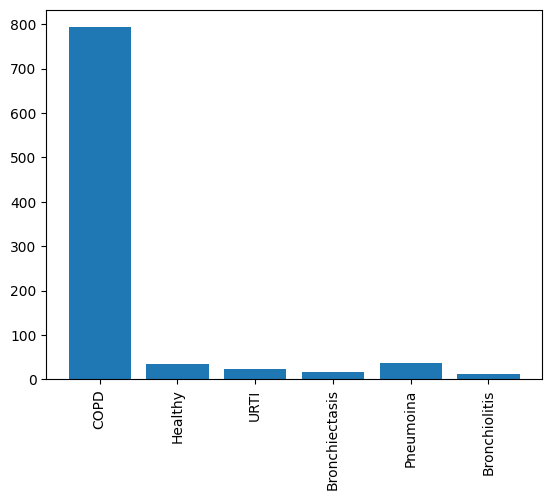

In [18]:
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.xticks(l, l1, rotation ='vertical')
plt.bar(counter.keys(), counter.values())
plt.show()

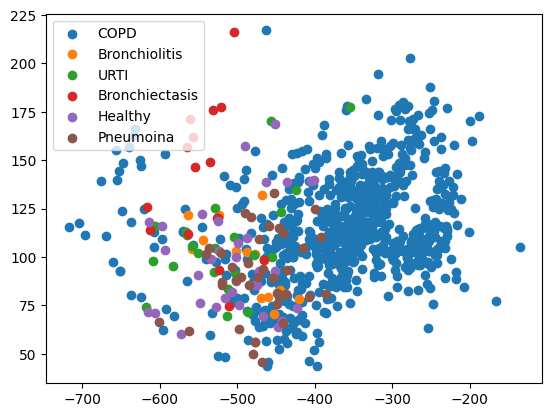

In [19]:
from numpy import where
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 plt.scatter(X[row_ix, 0], X[row_ix, 1], label=dict1[label])
plt.legend()
plt.show()

In [24]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [28]:
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

# define pipeline
#   over = SMOTE(sampling_strategy={1: , 2: , 3: ,4: ,5: })
#   under = RandomUnderSampler(sampling_strategy={0: 793})
#   steps = [('o', over), ('u', under)]
#   pipeline = Pipeline(steps=steps)

# X, y = pipeline.fit_resample(X, y)

Class=0.0, n=793 (16.667%)
Class=5.0, n=793 (16.667%)
Class=2.0, n=793 (16.667%)
Class=3.0, n=793 (16.667%)
Class=1.0, n=793 (16.667%)
Class=4.0, n=793 (16.667%)


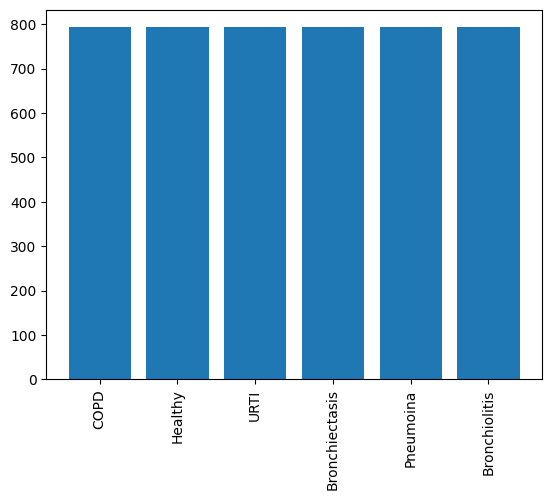

In [29]:
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.xticks(l, l1, rotation ='vertical')
plt.bar(counter.keys(), counter.values())
plt.show()

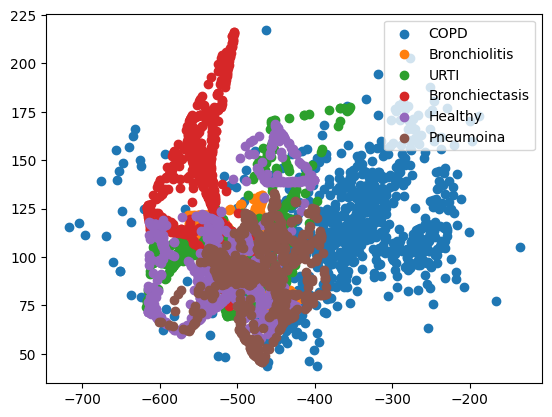

In [30]:
from numpy import where
for label, _ in counter.items():
 row_ix = where(y == label)[0]
#  print(row_ix)
 plt.scatter(X[row_ix, 0], X[row_ix, 1], label=dict1[label])
plt.legend()
plt.show()

In [ ]:
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [ ]:
y.shape

(917, 6)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(733, 40)

In [ ]:
X_test.shape

(184, 40)

In [ ]:
y_train.shape

(733, 6)

In [ ]:
y_test.shape

(184, 6)

In [ ]:
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train, y_train = resample.fit_resample(X, y)

In [ ]:
X_train.shape

(4758, 40)

In [ ]:
y_train.shape

(4758, 6)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
num_labels=y.shape[1]
num_labels

6

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Activation, MaxPooling1D, Dropout
from tensorflow.keras.utils import plot_model,to_categorical
from timeit import default_timer as timer
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta
from sklearn import metrics

In [ ]:
model = Sequential()


model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(40,1)))
model.add(Dropout(0.5))

model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(40, 1)))

# model.add(Conv1D(128, kernel_size=5, activation='relu'))
# model.add(MaxPooling1D(2))

# model.add(Conv1D(256, kernel_size=5, activation='relu'))

# model.add(Dropout(0.3))
# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(Dense(6, activation='softmax'))


model.add(Dense(num_labels))
model.add(Activation('softmax'))

# opt = tf.optimizers.Adam(learning_rate=0.99)
# model.compile(loss='categorical_crossentropy', optimizer=opt)


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 36, 64)            384       
                                                                 
 dropout_42 (Dropout)        (None, 36, 64)            0         
                                                                 
 conv1d_19 (Conv1D)          (None, 32, 64)            20544     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 16, 64)           0         
 1D)                                                             
                                                                 
 dropout_43 (Dropout)        (None, 16, 64)            0         
                                                                 
 conv1d_20 (Conv1D)          (None, 12, 64)            20544     
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32,callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
133/134 [============================>.] - ETA: 0s - loss: 2.0167 - accuracy: 0.1701
Epoch 1: val_loss improved from inf to 1.79090, saving model to saved_models/audio_classification.hdf5
134/134 [==============================] - 5s 19ms/step - loss: 2.0154 - accuracy: 0.1700 - val_loss: 1.7909 - val_accuracy: 0.1702
Epoch 2/100
133/134 [============================>.] - ETA: 0s - loss: 1.8009 - accuracy: 0.1736
Epoch 2: val_loss did not improve from 1.79090
134/134 [==============================] - 2s 17ms/step - loss: 1.8010 - accuracy: 0.1730 - val_loss: 1.7917 - val_accuracy: 0.1723
Epoch 3/100
134/134 [==============================] - ETA: 0s - loss: 1.7974 - accuracy: 0.1824
Epoch 3: val_loss did not improve from 1.79090
134/134 [==============================] - 2s 17ms/step - loss: 1.7974 - accuracy: 0.1824 - val_loss: 1.7924 - val_accuracy: 0.1723
Epoch 4/100
132/134 [============================>.] - ETA: 0s - loss: 1.7937 - accuracy: 0.1785
Epoch 4: val_loss d

In [ ]:
model.save("model_100_32_relu_90-10.h5")

In [ ]:
np.save('history_100_32_relu_90-10.npy',history.history)

In [ ]:
model1 = tf.keras.models.load_model('model_100_32_relu_80-20_batch_size_8.h5')

In [ ]:
history = np.load('history_100_32_relu_80-20_batch_size_8.npy',allow_pickle=True)

In [ ]:
print(history.item().keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
# Evaluating the model on the training and testing set
score_1 = model1.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score_1[1])

score_2 = model1.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score_2[1])

Training Accuracy:  0.7869154214859009
Testing Accuracy:  0.7678571343421936


In [ ]:
print("Training loss: ", score_1[0])
print("Testing loss: ", score_2[0])

Training loss:  0.44577839970588684
Testing loss:  0.4775426387786865


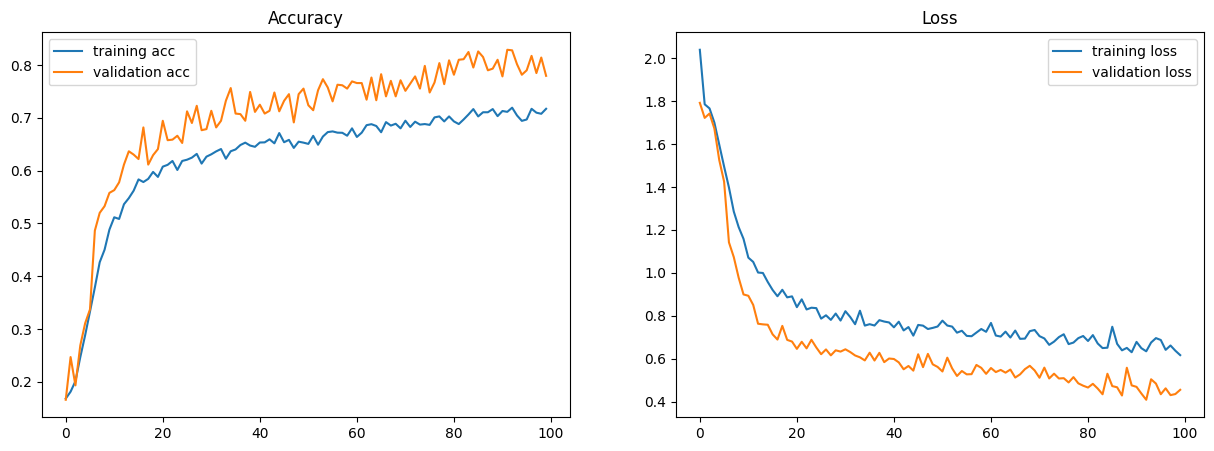

In [ ]:
# Plot accuracy and loss graphs
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(history.item()['accuracy'], label = 'training acc')
plt.plot(history.item()['val_accuracy'], label = 'validation acc')
plt.legend()

plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(history.item()['loss'], label = 'training loss')
plt.plot(history.item()['val_loss'], label = 'validation loss')
plt.legend()

30/30 [==============================] - 0s 4ms/step
                precision    recall  f1-score   support

          COPD       1.00      0.91      0.95       173
       Healthy       0.82      0.91      0.86       171
          URTI       0.42      0.93      0.58       137
Bronchiectasis       0.99      1.00      0.99       148
     Pneumoina       0.94      0.91      0.93       158
 Bronchiolitis       0.00      0.00      0.00       165

      accuracy                           0.77       952
     macro avg       0.69      0.78      0.72       952
  weighted avg       0.70      0.77      0.72       952



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: xlabel='Predicted', ylabel='Actual'>

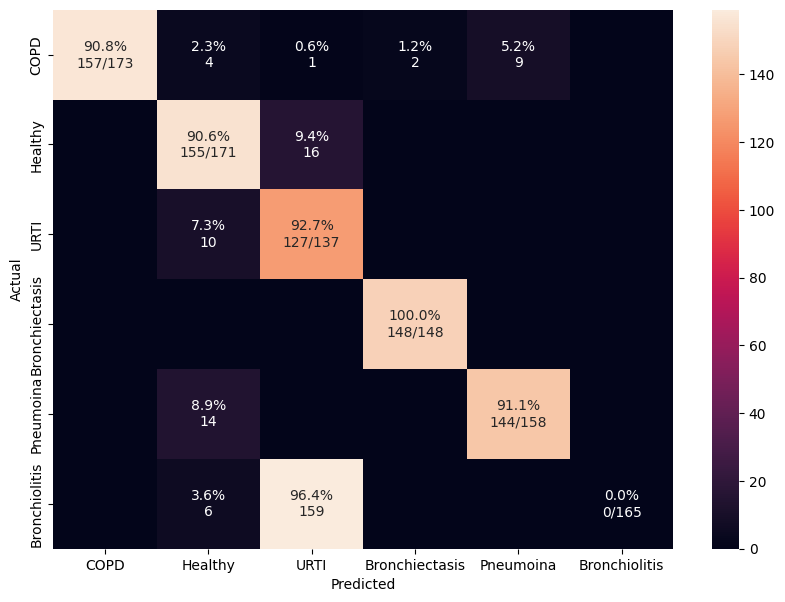

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
matrix_index = ["COPD", "Healthy", "URTI", "Bronchiectasis", "Pneumoina", "Bronchiolitis"]

preds = model1.predict(X_test)
classpreds = np.argmax(preds, axis=1) # predicted classes
y_testclass = np.argmax(y_test, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sn.heatmap(df_cm, annot=annot, fmt='')

In [ ]:
print("Actual \n", y_testclass)
print("\nPredicted \n",classpreds)

Actual 
 [2 0 2 4 0 5 5 2 1 4 3 3 2 4 2 3 0 4 5 4 2 2 4 4 3 2 1 0 4 5 4 0 4 4 2 2 1
 5 2 1 0 0 4 5 3 5 4 1 4 3 3 1 0 0 1 2 0 1 4 2 0 3 3 2 0 3 1 4 1 5 5 3 2 4
 5 1 0 2 1 0 4 0 5 5 1 4 2 1 3 1 3 3 5 5 1 5 1 3 1 3 5 0 3 4 1 3 2 4 5 1 0
 3 0 0 0 4 4 2 4 4 0 5 2 4 2 1 1 1 1 0 0 1 0 3 4 0 5 0 0 1 1 3 4 4 5 2 4 4
 4 4 0 4 4 5 4 1 1 5 0 1 0 5 2 3 3 2 5 2 1 1 5 3 1 3 4 0 1 3 5 5 4 0 4 0 3
 1 4 4 1 4 3 3 4 4 5 1 4 3 5 5 1 4 0 4 1 5 1 0 1 2 3 2 1 4 0 3 1 0 3 4 1 5
 0 2 2 3 5 1 3 5 3 3 4 2 2 0 1 4 3 2 0 2 5 5 0 5 1 1 2 1 4 2 0 1 3 1 0 5 1
 3 5 3 3 2 4 4 1 0 3 3 4 1 3 2 1 0 2 0 3 2 0 1 3 5 4 4 5 3 0 4 1 0 3 4 5 2
 1 2 1 0 3 1 2 3 0 5 5 4 5 2 2 0 1 2 4 5 3 2 2 1 3 3 1 2 5 2 1 1 0 5 3 4 5
 0 0 5 3 3 5 0 0 4 2 2 0 1 5 1 4 5 2 3 1 1 2 4 0 5 3 4 0 2 0 4 4 4 0 4 5 1
 0 2 4 1 2 3 0 4 5 0 3 3 3 2 5 5 3 5 4 0 5 5 1 1 2 4 0 5 4 0 3 1 5 2 2 3 4
 1 3 4 0 1 5 1 5 1 0 3 3 5 3 4 5 3 4 0 4 0 1 3 4 5 5 4 4 2 0 4 1 5 2 1 0 3
 5 2 1 0 1 1 3 2 2 0 1 0 1 1 1 1 0 5 5 0 4 2 0 5 0 1 1 3 2 0 4 3 0 5 2 2 0
 3 5 5 1 5 5 2 4

In [ ]:
dict1 = {0:"COPD", 1:"Healthy", 2:"URTI", 3:"Bronchiectasis", 4:"Pneumoina", 5:"Bronchiolitis"}

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
count = []
for i in counter.keys():
  count.append(int(i))
count.sort()
result=[]
for label in count:
  precision,recall,f_score,support = precision_recall_fscore_support(np.array(y_testclass) == label,np.array(classpreds) == label)
  result.append([dict1[label],recall[0],recall[1],recall[1],precision[1],f_score[1],support[1]])
df = pd.DataFrame(result,columns=["label","Specificity","Sensitivity","Recall","Precision","f_score","support"])
df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,label,Specificity,Sensitivity,Recall,Precision,f_score,support
0,COPD,1.000000,0.907514,0.907514,1.000000,0.951515,173
1,Healthy,0.956466,0.906433,0.906433,0.820106,0.861111,171
2,URTI,0.784049,0.927007,0.927007,0.419142,0.577273,137
3,Bronchiectasis,0.997512,1.000000,1.000000,0.986667,0.993289,148
4,Pneumoina,0.988665,0.911392,0.911392,0.941176,0.926045,158
5,Bronchiolitis,1.000000,0.000000,0.000000,0.000000,0.000000,165


In [ ]:
files=glob('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/*.wav')
files

['/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/104_1b1_Ll_sc_Litt3200.wav',
 '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/103_2b2_Ar_mc_LittC2SE.wav',
 '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/104_1b1_Pr_sc_Litt3200.wav',
 '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/101_1b1_Al_sc_Meditron.wav',
 '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/104_1b1_Al_sc_Litt3200.wav',
 '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/104_1b1_Ar_sc_Litt3200.wav',
 '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/104_1b1_Lr_sc_Litt3200.wav',
 '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/105_1b1_Tc_sc_Meditron.wav',
 '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/106_2b1_Pr_mc_LittC2SE.wav',
 '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/107_2b3_Ll_mc_AKGC4

In [ ]:
len(files)

920

In [ ]:
len(data[:,-1])

917

In [ ]:
to_hot_one = {0:"COPD", 1:"Healthy", 2:"URTI", 3:"Bronchiectasis", 4:"Pneumonia", 5:"Bronchiolitis", 6:"Asthma", 7:"LRTI"}

In [ ]:
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0
count_6 = 0
for i in range(0,917):
  file_name = files[i]
  print(to_hot_one[data[:,-1][i]])
  audio, sample_rate = librosa.load(file_name)
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

  mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)

  predicted_label=model.predict(mfccs_scaled_features)

  classes=predicted_label.argmax()
  print(classes)

  print(to_hot_one[classes])
  if(to_hot_one[data[:,-1][i]] == 'COPD'):
    if(to_hot_one[data[:,-1][i]] == to_hot_one[classes]):
      count_1 +=1
  if(to_hot_one[data[:,-1][i]] == 'Healthy'):
    if(to_hot_one[data[:,-1][i]] == to_hot_one[classes]):
      count_2 +=1
  if(to_hot_one[data[:,-1][i]] == 'URTI'):
    if(to_hot_one[data[:,-1][i]] == to_hot_one[classes]):
      count_3 +=1
  if(to_hot_one[data[:,-1][i]] == 'Bronchiectasis'):
    if(to_hot_one[data[:,-1][i]] == to_hot_one[classes]):
      count_4 +=1
  if(to_hot_one[data[:,-1][i]] == 'Pneumonia'):
    if(to_hot_one[data[:,-1][i]] == to_hot_one[classes]):
      count_5 +=1
  if(to_hot_one[data[:,-1][i]] == 'Bronchiolitis'):
    if(to_hot_one[data[:,-1][i]] == to_hot_one[classes]):
      count_6 +=1

print('COPD :',count_1)
print('Healthy :',count_2)
print('URTI :',count_3)
print('Bronchiectasis :',count_4)
print('Pneumonia :',count_5)
print('Bronchiolitis :',count_6)

  # prediction_class = label_encoder.inverse_transform(classes)
  # print(prediction_class)

COPD
1/1 [==============================] - 0s 28ms/step
0
COPD
COPD
1/1 [==============================] - 0s 33ms/step
2
URTI
COPD
1/1 [==============================] - 0s 44ms/step
0
COPD
COPD
1/1 [==============================] - 0s 29ms/step
5
Bronchiolitis
COPD
1/1 [==============================] - 0s 29ms/step
0
COPD
COPD
1/1 [==============================] - 0s 30ms/step
0
COPD
COPD
1/1 [==============================] - 0s 29ms/step
0
COPD
COPD
1/1 [==============================] - 0s 38ms/step
5
Bronchiolitis
COPD
1/1 [==============================] - 0s 34ms/step
0
COPD
COPD
1/1 [==============================] - 0s 46ms/step
0
COPD
COPD
1/1 [==============================] - 0s 35ms/step
0
COPD
COPD
1/1 [==============================] - 0s 32ms/step
0
COPD
COPD
1/1 [==============================] - 0s 36ms/step
0
COPD
COPD
1/1 [==============================] - 0s 33ms/step
0
COPD
COPD
1/1 [==============================] - 0s 31ms/step
0
COPD
Bronchiolitis
1/1 [===

In [ ]:
files=glob('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/Real_time_audios/*.mp3')

In [ ]:
files

['/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/Real_time_audios/wheezing.mp3',
 '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/Real_time_audios/crackle.mp3',
 '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/Real_time_audios/Pneumonia.mp3',
 '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/Real_time_audios/Bronchiolitis.mp3',
 '/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/Real_time_audios/Bronchietasis.mp3']

In [ ]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from os import path
from pydub import AudioSegment

In [ ]:
from os import path
from pydub import AudioSegment

# files
src = files[0]
dst = "test.wav"

# convert wav to mp3
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='test.wav'>

In [ ]:
file_name = "/content/test.wav"
audio, sample_rate = librosa.load(file_name)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)

predicted_label=model.predict(mfccs_scaled_features)

classes=predicted_label.argmax()
print(classes)

print(to_hot_one[classes])

1/1 [==============================] - 0s 104ms/step
0
COPD
